# Setup & Imports

This cell sets up the Python environment and imports all Swarm Intelligence algorithms for parameter sensitivity testing.

- Adds the parent directory to Python path
- Imports essential libraries: numpy, matplotlib, time
- Configures matplotlib for inline display
- Imports all Swarm Intelligence algorithms (PSO, ABC, FA, CS, ACO) and Rastrigin problem


In [31]:
import sys
import os

# Add parent directory to Python path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import time

# Configure matplotlib for inline display in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

# Import all Swarm Intelligence algorithms
from algorithms import pso, abc, fa, cs, aco
from problems.rastrigin import rastrigin

print("✓ Imports successful!")
print(f"✓ Module path added: {module_path}")
print("✓ All Swarm Intelligence algorithms imported (PSO, ABC, FA, CS, ACO)")


✓ Imports successful!
✓ Module path added: /mnt/d/02_University_HCMUS/Year_3/Sem_5/04_Intro2AI/algorithm
✓ All Swarm Intelligence algorithms imported (PSO, ABC, FA, CS, ACO)


# Common Parameters

Define common parameters used for all algorithms in parameter sensitivity testing.

- D: Problem dimension
- N_RUNS: Number of runs for statistical reliability
- POP_SIZE: Population size
- MAX_ITER: Maximum number of iterations


In [32]:
# Common parameters for all algorithms
D = 10  # Dimension
N_RUNS = 5  # Number of runs (set to 1 for fastest testing, higher for more reliable results)
POP_SIZE = 50  # Population size
MAX_ITER = 50  # Maximum number of iterations

# Setup problem bounds
bounds = np.array([[-5.12, 5.12]] * D)

print("=" * 60)
print("COMMON PARAMETERS")
print("=" * 60)
print(f"Dimension: {D}")
print(f"Number of runs: {N_RUNS}")
print(f"Population size: {POP_SIZE}")
print(f"Max iterations: {MAX_ITER}")
print("=" * 60)


COMMON PARAMETERS
Dimension: 10
Number of runs: 5
Population size: 50
Max iterations: 50


# Algorithm Configurations

Define parameter configurations for each Swarm Intelligence algorithm.

**Instructions:**
1. Uncomment the section for the algorithm you want to test
2. Comment out all other algorithm sections
3. Each config contains algorithm-specific parameters and a descriptive label
4. Run the next cell to execute parameter sensitivity tests

**Available algorithms:**
- PSO: Parameters w, c1, c2
- ABC: Parameter limit
- FA: Parameters alpha, beta0, gamma
- CS: Parameters pa, beta
- ACO: Parameters archive_size, q, xi


In [33]:
# ============================================================================
# ALGORITHM CONFIGURATIONS
# ============================================================================
# Uncomment ONE section below to test that algorithm's parameter sensitivity
# Comment out all other sections
# ============================================================================

# ===== PSO PARAMETER SENSITIVITY TEST =====
# Uncomment the section below to test PSO

CONFIGS = [
    {'w': 0.5, 'c1': 1.5, 'c2': 1.5, 'label': 'PSO: w=0.5, c1=1.5, c2=1.5'},
    {'w': 0.7, 'c1': 2.0, 'c2': 2.0, 'label': 'PSO: w=0.7, c1=2.0, c2=2.0'},
    {'w': 0.8, 'c1': 2.0, 'c2': 2.0, 'label': 'PSO: w=0.8, c1=2.0, c2=2.0'},
    {'w': 0.9, 'c1': 2.5, 'c2': 2.5, 'label': 'PSO: w=0.9, c1=2.5, c2=2.5'},
    {'w': 1.0, 'c1': 2.0, 'c2': 2.0, 'label': 'PSO: w=1.0, c1=2.0, c2=2.0'},
    {'w': 0.8, 'c1': 1.5, 'c2': 2.5, 'label': 'PSO: w=0.8, c1=1.5, c2=2.5'},
    {'w': 0.8, 'c1': 2.5, 'c2': 1.5, 'label': 'PSO: w=0.8, c1=2.5, c2=1.5'},
]
ALGORITHM_FUNC = pso.pso_continuous
ALGORITHM_NAME = 'PSO'

# ===== ABC PARAMETER SENSITIVITY TEST =====
# Uncomment the section below to test ABC

# CONFIGS = [
#     {'limit': 5, 'label': 'ABC: limit=5'},
#     {'limit': 10, 'label': 'ABC: limit=10'},
#     {'limit': 20, 'label': 'ABC: limit=20'},
#     {'limit': 50, 'label': 'ABC: limit=50'},
#     {'limit': 100, 'label': 'ABC: limit=100'},
# ]
# ALGORITHM_FUNC = abc.abc_continuous
# ALGORITHM_NAME = 'ABC'

# ===== FA PARAMETER SENSITIVITY TEST =====
# Uncomment the section below to test FA

# CONFIGS = [
#     {'alpha': 0.2, 'beta0': 1.0, 'gamma': 0.95, 'label': 'FA: α=0.2, β₀=1.0, γ=0.95'},
#     {'alpha': 0.5, 'beta0': 1.0, 'gamma': 0.95, 'label': 'FA: α=0.5, β₀=1.0, γ=0.95'},
#     {'alpha': 0.8, 'beta0': 1.0, 'gamma': 0.95, 'label': 'FA: α=0.8, β₀=1.0, γ=0.95'},
#     {'alpha': 0.5, 'beta0': 0.5, 'gamma': 0.95, 'label': 'FA: α=0.5, β₀=0.5, γ=0.95'},
#     {'alpha': 0.5, 'beta0': 2.0, 'gamma': 0.95, 'label': 'FA: α=0.5, β₀=2.0, γ=0.95'},
#     {'alpha': 0.5, 'beta0': 1.0, 'gamma': 0.5, 'label': 'FA: α=0.5, β₀=1.0, γ=0.5'},
#     {'alpha': 0.5, 'beta0': 1.0, 'gamma': 1.5, 'label': 'FA: α=0.5, β₀=1.0, γ=1.5'},
# ]
# ALGORITHM_FUNC = fa.firefly_continuous
# ALGORITHM_NAME = 'FA'

# ===== CS PARAMETER SENSITIVITY TEST =====
# Uncomment the section below to test CS

# CONFIGS = [
#     {'pa': 0.1, 'beta': 1.0, 'label': 'CS: pa=0.1, β=1.0'},
#     {'pa': 0.25, 'beta': 1.5, 'label': 'CS: pa=0.25, β=1.5'},
#     {'pa': 0.5, 'beta': 1.5, 'label': 'CS: pa=0.5, β=1.5'},
#     {'pa': 0.25, 'beta': 1.0, 'label': 'CS: pa=0.25, β=1.0'},
#     {'pa': 0.25, 'beta': 2.0, 'label': 'CS: pa=0.25, β=2.0'},
# ]
# ALGORITHM_FUNC = cs.cuckoo_search_continuous
# ALGORITHM_NAME = 'CS'

# ===== ACO PARAMETER SENSITIVITY TEST =====
# Uncomment the section below to test ACO (continuous version)

# CONFIGS = [
#     {'archive_size': 50, 'q': 0.1, 'xi': 0.5, 'label': 'ACO: archive=50,q=0.1, ξ=0.5'},
#     {'archive_size': 50, 'q': 0.1, 'xi': 0.85, 'label': 'ACO: archive=50, q=0.1, ξ=0.85'},
#     {'archive_size': 50, 'q': 0.1, 'xi': 1.0, 'label': 'ACO: archive=50, q=0.1, ξ=1.0'},
#     {'archive_size': 50, 'q': 0.5, 'xi': 0.85, 'label': 'ACO: archive=50, q=0.5, ξ=0.85'},
#     {'archive_size': 50, 'q': 1.0, 'xi': 0.85, 'label': 'ACO: archive=50, q=1.0, ξ=0.85'},
#     {'archive_size': 100, 'q': 0.1, 'xi': 0.85, 'label': 'ACO: archive=100, q=0.1, ξ=0.85'},
# ]
# ALGORITHM_FUNC = aco.aco_continuous
# ALGORITHM_NAME = 'ACO'

# ============================================================================
# IMPORTANT: Make sure to uncomment ONE algorithm section above
# and define CONFIGS and ALGORITHM_FUNC variables
# ============================================================================

# Check if configuration is set
try:
    CONFIGS
    ALGORITHM_FUNC
    ALGORITHM_NAME
    print(f"✓ Configuration loaded: {ALGORITHM_NAME}")
    print(f"✓ Number of configs: {len(CONFIGS)}")
except NameError:
    print("⚠ WARNING: No algorithm configuration selected!")
    print("Please uncomment ONE algorithm section above and run this cell again.")


✓ Configuration loaded: PSO
✓ Number of configs: 7


# Run Parameter Sensitivity Tests

Execute parameter sensitivity tests for all configurations.

- Runs each configuration N_RUNS times for statistical reliability
- Computes average convergence history for each configuration
- Stores results in memory for visualization
- Special handling for ACO which requires archive_size parameter


In [34]:
# Run parameter sensitivity tests
all_histories = {}  # Dictionary to store average convergence for each config

print("=" * 60)
print(f"PARAMETER SENSITIVITY TEST: {ALGORITHM_NAME}")
print("=" * 60)
print(f"Testing {len(CONFIGS)} configurations")
print(f"Each config will run {N_RUNS} times")
print("=" * 60)

for config_idx, config in enumerate(CONFIGS, 1):
    config_label = config['label']
    print(f"\n[{config_idx}/{len(CONFIGS)}] Testing: {config_label}")
    
    # Extract parameters (exclude 'label' key)
    params = {k: v for k, v in config.items() if k != 'label'}
    
    # Run N_RUNS times
    config_histories = []
    for run in range(N_RUNS):
        print(f"  Run {run+1}/{N_RUNS}...", end=" ")
        start_time = time.time()
        
        # Special handling for ACO (needs archive_size as separate parameter)
        if ALGORITHM_NAME == 'ACO':
            archive_size = params.get('archive_size', POP_SIZE)
            # Create copy of params without archive_size for **kwargs
            aco_params = {k: v for k, v in params.items() if k != 'archive_size'}
            sol, fit, hist = ALGORITHM_FUNC(
                rastrigin, bounds, D, archive_size, POP_SIZE, MAX_ITER, **aco_params
            )
        else:
            # All other algorithms
            sol, fit, hist = ALGORITHM_FUNC(
                rastrigin, bounds, D, POP_SIZE, MAX_ITER, **params
            )
        
        elapsed = time.time() - start_time
        config_histories.append(hist)
        print(f"Fitness: {fit:.4f} ({elapsed:.2f}s)")
    
    # Calculate average convergence history
    max_len = max(len(h) for h in config_histories)
    padded_histories = []
    for h in config_histories:
        if len(h) < max_len:
            padded = list(h) + [h[-1]] * (max_len - len(h))
        else:
            padded = h
        padded_histories.append(padded)
    
    avg_history = np.mean(np.array(padded_histories), axis=0)
    all_histories[config_label] = avg_history
    
    # Calculate final statistics
    final_fitnesses = [h[-1] for h in config_histories]
    avg_final = np.mean(final_fitnesses)
    std_final = np.std(final_fitnesses)
    print(f"  → Avg final fitness: {avg_final:.4f} ± {std_final:.4f}")

print(f"\n{'='*60}")
print("ALL TESTS COMPLETED!")
print(f"{'='*60}")
print(f"Results stored for {len(all_histories)} configurations")


PARAMETER SENSITIVITY TEST: PSO
Testing 7 configurations
Each config will run 5 times

[1/7] Testing: PSO: w=0.5, c1=1.5, c2=1.5
  Run 1/5... Fitness: 14.9265 (0.08s)
  Run 2/5... Fitness: 33.8284 (0.07s)
  Run 3/5... Fitness: 12.9364 (0.07s)
  Run 4/5... Fitness: 31.8386 (0.06s)
  Run 5/5... Fitness: 13.9336 (0.06s)
  → Avg final fitness: 21.4927 ± 9.3024

[2/7] Testing: PSO: w=0.7, c1=2.0, c2=2.0
  Run 1/5... Fitness: 21.7753 (0.07s)
  Run 2/5... Fitness: 15.4968 (0.07s)
  Run 3/5... Fitness: 27.1694 (0.07s)
  Run 4/5... Fitness: 22.1344 (0.08s)
  Run 5/5... Fitness: 18.1952 (0.09s)
  → Avg final fitness: 20.9542 ± 3.9520

[3/7] Testing: PSO: w=0.8, c1=2.0, c2=2.0
  Run 1/5... Fitness: 25.0347 (0.07s)
  Run 2/5... Fitness: 28.3215 (0.07s)
  Run 3/5... Fitness: 18.6476 (0.06s)
  Run 4/5... Fitness: 43.8170 (0.09s)
  Run 5/5... Fitness: 43.2301 (0.09s)
  → Avg final fitness: 31.8102 ± 10.0589

[4/7] Testing: PSO: w=0.9, c1=2.5, c2=2.5
  Run 1/5... Fitness: 46.1777 (0.08s)
  Run 2/5... 

# Visualization

Plot all convergence curves on the same graph for easy comparison.

- Each curve represents one parameter configuration
- Curves are labeled with their configuration parameters
- Uses log scale on y-axis for better visualization
- Color scheme automatically assigned to distinguish configurations


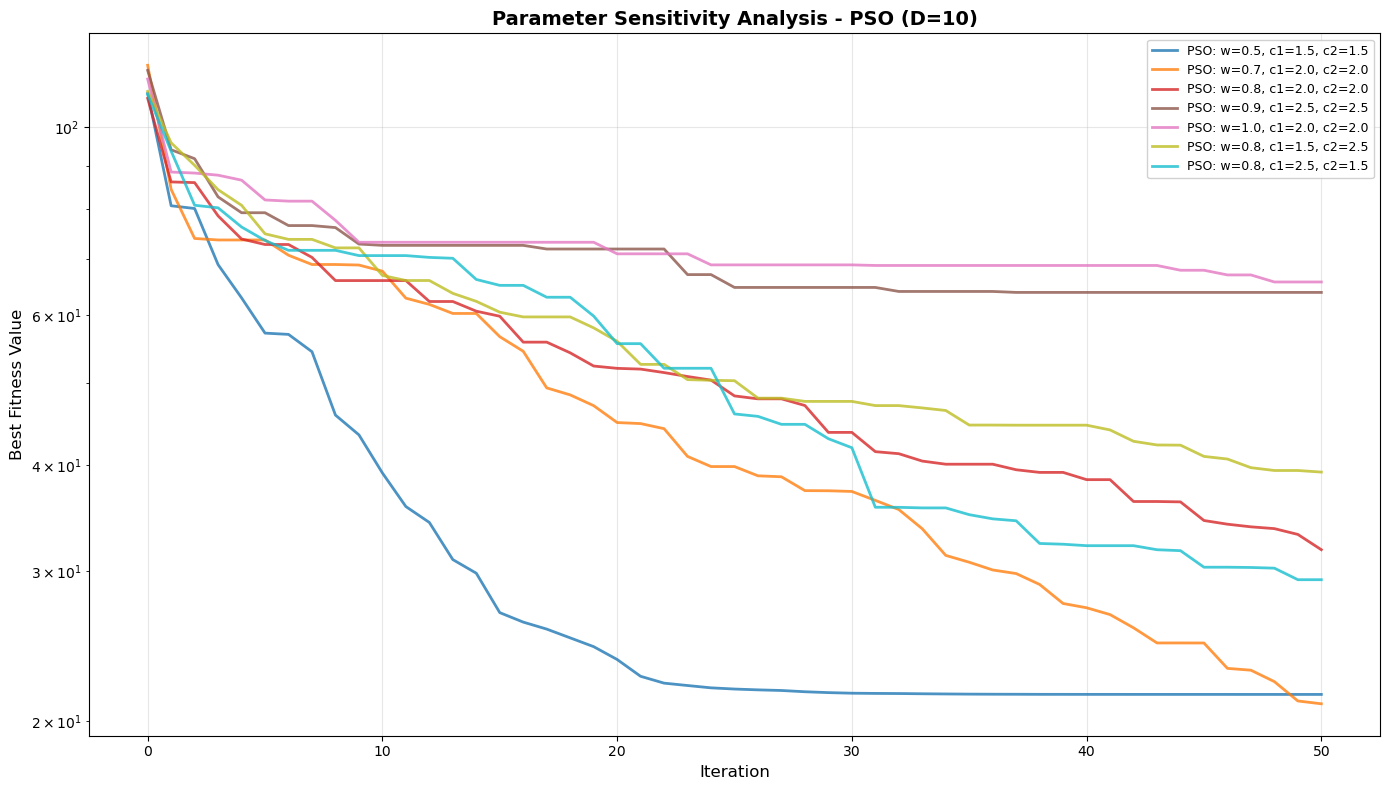


✓ Plotted 7 convergence curves
💡 Compare curves to identify best parameter configuration!


In [35]:
# Create color scheme for different configurations
colors = plt.cm.tab10(np.linspace(0, 1, len(all_histories)))

# Plot all convergence curves
fig, ax = plt.subplots(figsize=(14, 8))

for idx, (label, history) in enumerate(all_histories.items()):
    ax.plot(history, linewidth=2, color=colors[idx], label=label, alpha=0.8)

ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Best Fitness Value', fontsize=12)
ax.set_title(f'Parameter Sensitivity Analysis - {ALGORITHM_NAME} (D={D})', 
            fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=9, framealpha=0.9)
ax.grid(True, alpha=0.3)
ax.set_yscale('log')  # Log scale for better visualization

plt.tight_layout()
plt.show()

print(f"\n✓ Plotted {len(all_histories)} convergence curves")
print("💡 Compare curves to identify best parameter configuration!")
